Index(['Date', 'OJ_Open', 'OJ_High', 'OJ_Low', 'OJ_Close', 'OJ_adj_close',
       'OJ_Volume', 'Open', 'High', 'Low', 'Close ', 'Adj Close ', 'Volume'],
      dtype='object')
MSE: 9.926229257563481
MAPE: 7668643980230.811
MAE: 2.2276792323195753
Dir acc: 0.5147759771210677
Coefficients: 
OJ_Open -0.013446526398489493
OJ_High -0.005665835551579278
OJ_Low 0.0022394458227880977
OJ_Close 0.009433090001863249
OJ_adj_close 0.00943309000186336
OJ_Volume 8.248528830334754e-07
Open -0.05033549084301441
High 0.07340433472538349
Low 0.0595913547789714
Close  -0.04270677079420668
Adj Close  -0.0427067707942068
Volume -1.973290068231319e-06
OJ_change 0.001372661627634778
7668643980230.811


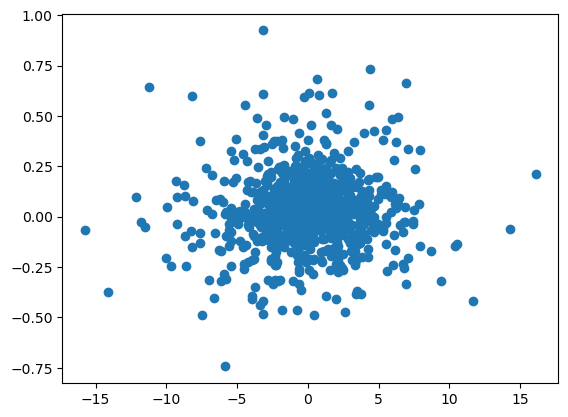

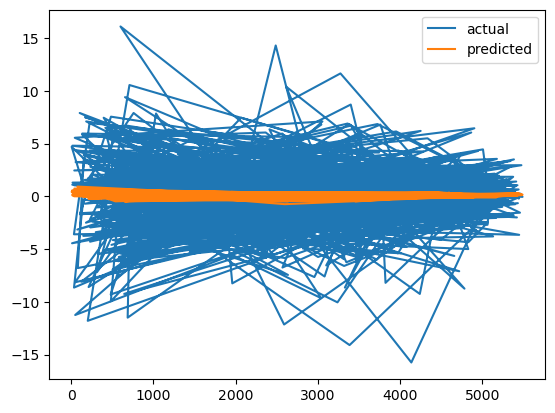

(1049,) (1049,)
3344   -0.45
5418   -2.00
895     0.10
5254    1.75
2969   -1.20
Name: change, dtype: float64
3344   -0.366115
5418    0.135291
895     0.035393
5254    0.095176
2969    0.044578
dtype: float64


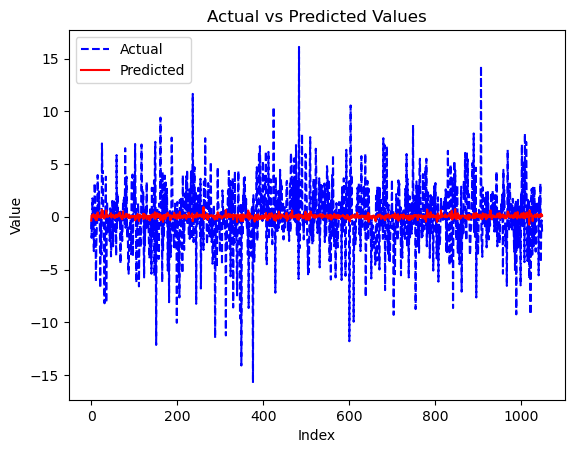

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_absolute_error

def clean_data(data):
    data = data.dropna()
    for column in data.columns:
        #print(data[column].dtype)
        if data[column].dtype == 'object':
            data[column] = data[column].str.replace('-', '')
            data[column] = data[column].str.replace(',', '')
            data[column] = data[column].replace('', np.nan)
            data[column] = data[column].astype(float)
    return data


weather_columbia = pd.read_csv('columbia_weather_main.csv')
weather_columbia = weather_columbia.dropna()
gold_prices = pd.read_csv('gold_futures_OHCLV.csv')
gold_prices = gold_prices.dropna()
coffee = pd.read_csv('KC=F.csv')
coffee = coffee.dropna()
juice = pd.read_csv('OJ_futures_OHCLV.csv', encoding='ISO-8859-1')
#juice = pd.read_csv('OJ_futures_OHCLV.csv', encoding='utf-8', error_bad_lines=False, engine='python')
exchange = pd.read_csv('USD_Columbia.csv')
exchange = exchange.dropna()
juice = juice.dropna()
oil = pd.read_csv('oil.csv', encoding='ISO-8859-1')
oil = oil.dropna()
oil['Date'] = pd.to_datetime(oil['Date'])
oil = clean_data(oil)
oil = oil.dropna()
oil.columns = ['Date', 'Oil_Open', 'Oil_High', 'Oil_Low', 'Oil_Close', 'Oil_adj_close', 'Oil_Volume']
corn = pd.read_csv('corn.csv', encoding='ISO-8859-1')
corn = corn.dropna()
corn['Date'] = pd.to_datetime(corn['Date'])
corn = clean_data(corn)
corn.columns = ['Date', 'Corn_Open', 'Corn_High', 'Corn_Low', 'Corn_Close', 'Corn_adj_close', 'Corn_Volume']
soybean = pd.read_csv('soybeans.csv', encoding='ISO-8859-1')
soybean = soybean.dropna()
soybean['Date'] = pd.to_datetime(soybean['Date'])
soybean = clean_data(soybean)
soybean.columns = ['Date', 'Soybean_Open', 'Soybean_High', 'Soybean_Low', 'Soybean_Close', 'Soybean_adj_close', 'Soybean_Volume']



#print(weather_columbia.head())
#print(gold_prices)
gold_prices['Date'] = pd.to_datetime(gold_prices['Date'])
coffee['Date'] = pd.to_datetime(coffee['Date'])
juice['Date'] = pd.to_datetime(juice['Date'])
weather_columbia['Date'] = pd.to_datetime(weather_columbia['datetime'])
weather_columbia = weather_columbia.drop(columns=['datetime'])
juice = clean_data(juice)
coffee = clean_data(coffee)
exchange['Date'] = pd.to_datetime(exchange['Date'])
exchange = clean_data(exchange)

#weather_columbia = clean_data(weather_columbia)
gold_prices = clean_data(gold_prices)

juice.columns = ['Date', 'OJ_Open', 'OJ_High', 'OJ_Low', 'OJ_Close', 'OJ_adj_close', 'OJ_Volume']
gold_prices.columns = ['Date', 'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_adj_close', 'Gold_Volume']
exchange.columns = ['Date', 'USD_COP_Open', 'USD_COP_High', 'USD_COP_Low', 'USD_COP_Close', 'USD_COP_adj_close', 'USD_COP_Volume']


#joined_dataset = pd.merge(weather_columbia, gold_prices, on='Date')
#joined_dataset = pd.merge(joined_dataset, coffee, on='Date')
#joined_dataset = pd.merge(joined_dataset, juice, on='Date')
#print(joined_dataset.columns)

juice_and_coffee = pd.merge(juice, coffee, on='Date')
juice_and_coffe = juice_and_coffee.sort_values(by='Date')
print(juice_and_coffee.columns)

close = juice_and_coffee.columns[10]
juice_and_coffee['OJ_change'] = juice_and_coffee['OJ_Close'] - juice_and_coffee['OJ_Close'].shift(-1)
juice_and_coffee['change'] = juice_and_coffee[close].shift(1) - juice_and_coffee[close]
juice_and_coffee.dropna(inplace=True)






from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

x = juice_and_coffee.drop(columns=['Date', 'change'])
y = juice_and_coffee['change']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions_series = pd.Series(predictions, index=y_test.index)


print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAPE: " + str(mean_absolute_percentage_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))
actual_directions = np.sign(y_test)
predicted_directions = np.sign(predictions)

# Step 2: Check if directions match (1 for match, 0 for no match)
directional_matches = (actual_directions == predicted_directions).astype(int)

# Step 3: Calculate directional accuracy
directional_accuracy = directional_matches.sum() / len(directional_matches)

print("Dir acc: " + str(directional_accuracy))
print("Coefficients: ")
plot = plt.scatter(y_test, predictions)

for name, coef in zip(x.columns, model.coef_):
    print(name, coef)
    
print(mean_absolute_percentage_error(y_test, predictions))


plot = pd.DataFrame({'actual': y_test, 'predicted': predictions_series})
#plot.xlabel('actual')
#plot.ylabel('predicted')
plot.plot()
plt.show()

print(y_test.shape, predictions_series.shape)
print(y_test.head())
print(predictions_series.head())
predictions_series = predictions_series.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

plt.plot(y_test.index, y_test.values, label="Actual", color='blue', linestyle='--')
plt.plot(predictions_series.index, predictions_series.values, label="Predicted", color='red', linestyle='-')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()






In [309]:
import pandas as pd

file_path = 'columbia_weather_main.csv'
weather_data = pd.read_csv(file_path)

weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

irrelevant_columns = ['name', 'description', 'icon', 'stations', 'preciptype']
weather_data = weather_data.drop(columns=[col for col in irrelevant_columns if col in weather_data.columns], errors='ignore')


threshold = 0.5
weather_data = weather_data.loc[:, weather_data.isnull().mean() < threshold]

weather_data = weather_data.fillna(weather_data.median(numeric_only=True))

if 'conditions' in weather_data.columns:
    weather_data = pd.get_dummies(weather_data, columns=['conditions'], drop_first=True)
weather_data['sunrise'] = pd.to_datetime(weather_data['sunrise'])
weather_data['sunset'] = pd.to_datetime(weather_data['sunset'])
weather_data['sunrise'] = weather_data['sunrise'].dt.hour
weather_data['sunset'] = weather_data['sunset'].dt.hour
weather_data = clean_data(weather_data)
weather_data['month'] = weather_data['datetime'].dt.month
weather_data['day_of_week'] = weather_data['datetime'].dt.dayofweek
weather_data['day_of_year'] = weather_data['datetime'].dt.dayofyear
weather_data['season'] = weather_data['month'] % 12 // 3 + 1  # 1=Winter, 2=Spring, etc.
weather_data['Date'] = weather_data['datetime'].dt.date

weather_data = weather_data.drop(columns=['datetime'])


print(weather_data)

      tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0        17.1     10.1  13.2          17.1          10.1       13.2   9.2   
1        18.1     10.1  13.5          18.1          10.1       13.5   8.3   
2        21.1      8.1  13.5          21.1           6.4       13.3   8.1   
3        17.2     11.1  14.0          17.2          11.1       14.0   8.3   
4        17.2     10.1  13.2          17.2          10.1       13.2   9.8   
...       ...      ...   ...           ...           ...        ...   ...   
7683     21.2      9.0  15.4          21.2           8.4       15.3   8.2   
7684     19.3     10.0  14.5          19.3           8.7       14.3   7.6   
7685     20.3      7.0  14.3          20.3           6.2       14.2   8.2   
7686     21.2     10.3  15.2          21.2          10.3       15.2   9.5   
7687     22.2      8.9  14.4          22.2           8.9       14.4  10.6   

      humidity  precip  precipprob  ...  conditions_Overcast  \
0         7

In [310]:
# Step 1: Calculate directional changes
actual_directions = np.sign(y_test)
predicted_directions = np.sign(y_test_pred)

# Step 2: Check if directions match (1 for match, 0 for no match)
directional_matches = (actual_directions == predicted_directions).astype(int)

# Step 3: Calculate directional accuracy
directional_accuracy = directional_matches.sum() / len(directional_matches)
print(directional_accuracy)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

torch.Size([4192, 1, 13])
Epoch 0 loss: 10.462989807128906
Epoch 100 loss: 10.076465606689453
Epoch 200 loss: 10.067270278930664
Epoch 300 loss: 10.045000076293945
Epoch 400 loss: 10.035252571105957
Epoch 500 loss: 9.988262176513672
Epoch 600 loss: 9.964015007019043
Epoch 700 loss: 9.97856616973877
Epoch 800 loss: 9.941826820373535
Epoch 900 loss: 9.919415473937988
Epoch 1000 loss: 9.970466613769531
Epoch 1100 loss: 9.911940574645996
Epoch 1200 loss: 9.934260368347168
Epoch 1300 loss: 9.882309913635254
Epoch 1400 loss: 9.914949417114258


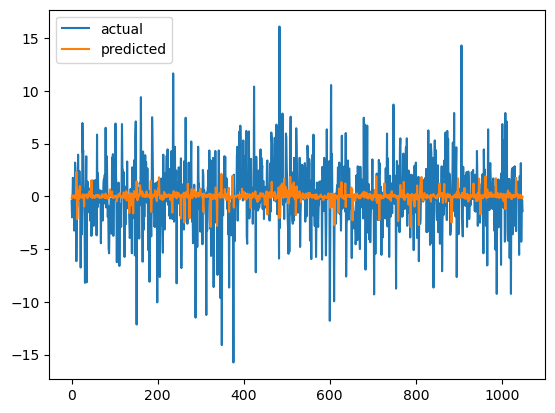

10.263556862522782

In [311]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.3)
        self.layer_norm = nn.LayerNorm(hidden_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.layer_norm(out)
        out = self.dropout(out)
        out = self.fc(out[:, -1, :])
        return out
    
model = RNN(input_size=13, hidden_size=64, num_layers=4, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

x_train_tensor = torch.from_numpy(x_train.values).float().view(-1, 1, 13)
x_test_tensor = torch.from_numpy(x_test.values).float().view(-1, 1, 13)
print(x_train_tensor.shape)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)

n_epochs = 1500
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')
    
y_test_pred = model(x_test_tensor)
y_test_pred = y_test_pred.detach().numpy()
y_test_pred = pd.Series(y_test_pred.flatten(), index=y_test.index)

plot = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred})
plot.plot()
plt.show()
mean_squared_error(y_test, y_test_pred)
        

In [312]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import meanabs
from sklearn.model_selection import GridSearchCV

model = ARIMA(y_train, order=(5, 1, 4))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(y_test))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))
print(meanabs(y_test, predictions))

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

# Sample Time Series Data
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # Replace with your series
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define parameter grid
p_values = [0, 1, 2,3,4,5]
d_values = [0, 1,2,3]
q_values = [0, 1, 2,3,4,5]
param_grid = product(p_values, d_values, q_values)

# Perform grid search
best_mse = float("inf")
best_order = None
results = []

#for order in param_grid:
#    try:
#        # Train ARIMA model
#        model = ARIMA(train, order=order)
#        model_fit = model.fit()
#        
        # Predict on test set
        #predictions = model_fit.forecast(steps=len(test))
        #mse = mean_squared_error(test, predictions)
        
        # Record results
        #results.append((order, mse))
        #print(f"Order: {order}, MSE: {mse}")
        
        # Update best parameters
       # if mse < best_mse:
        #    best_mse = mse
         #   best_order = order
   # except Exception as e:
   #     print(f"Order {order} failed: {e}")

# Print the best order
#print(f"Best ARIMA order: {best_order}, MSE: {best_mse}")



c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWar

9.941298571517077
3287874145753.821
2.230317307364537


c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [313]:
# Step 1: Calculate directional changes
actual_directions = np.sign(y_test)
predicted_directions = np.sign(y_test_pred)

# Step 2: Check if directions match (1 for match, 0 for no match)
directional_matches = (actual_directions == predicted_directions).astype(int)
directional_accuracy = directional_matches.sum() / len(directional_matches)
print(directional_accuracy)

0.4909437559580553


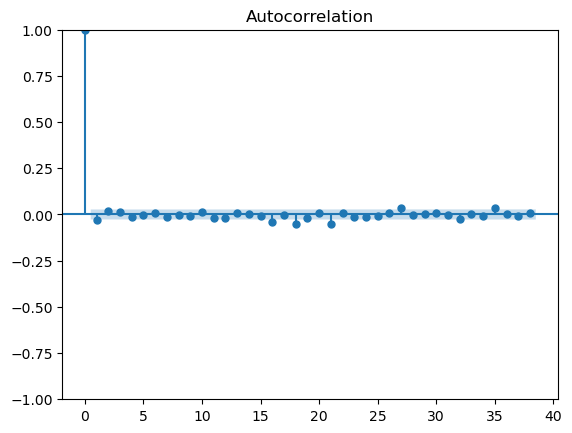

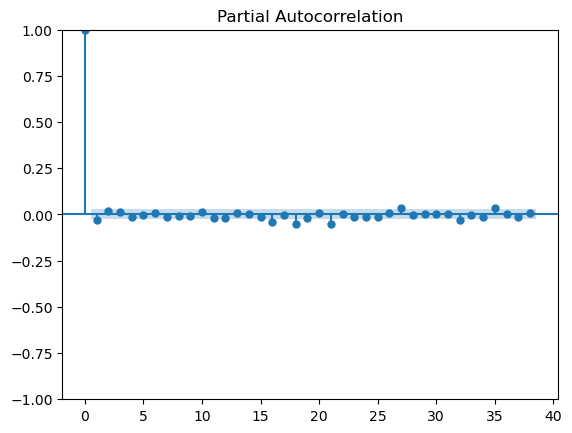

In [314]:
#acf, pacf
import statsmodels.graphics.tsaplots as plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

acf = plot_acf(juice_and_coffee['change'])
pacf = plot_pacf(juice_and_coffee['change'])
#plt.plot(acf)
#plt.plot(pacf)
#plt.show()

In [204]:

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(input_size=13, hidden_size=16, num_layers=1, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

n_epochs = 1000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if(epoch % 10 == 0):
        print(f'Epoch {epoch} loss: {loss.item()}')
    
y_test_pred = model(x_test_tensor)


Epoch 0 loss: 10.103273391723633
Epoch 10 loss: 10.05814266204834
Epoch 20 loss: 10.044143676757812
Epoch 30 loss: 10.02869701385498
Epoch 40 loss: 10.017130851745605
Epoch 50 loss: 10.009743690490723
Epoch 60 loss: 9.997456550598145
Epoch 70 loss: 9.986939430236816
Epoch 80 loss: 9.980599403381348
Epoch 90 loss: 9.970487594604492
Epoch 100 loss: 9.966036796569824
Epoch 110 loss: 9.962615013122559
Epoch 120 loss: 9.9572114944458
Epoch 130 loss: 9.953667640686035
Epoch 140 loss: 9.947566032409668
Epoch 150 loss: 9.945892333984375
Epoch 160 loss: 9.938915252685547
Epoch 170 loss: 9.929689407348633
Epoch 180 loss: 9.92089557647705
Epoch 190 loss: 9.92146110534668
Epoch 200 loss: 9.915750503540039
Epoch 210 loss: 9.916594505310059
Epoch 220 loss: 9.913101196289062
Epoch 230 loss: 9.922587394714355
Epoch 240 loss: 9.999251365661621
Epoch 250 loss: 9.937154769897461
Epoch 260 loss: 9.924221992492676
Epoch 270 loss: 9.90582275390625
Epoch 280 loss: 9.889461517333984
Epoch 290 loss: 9.88763904

In [205]:
mse = mean_squared_error(y_test, y_test_pred.detach().numpy())
print(mse)



print(mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred.detach().numpy())
print(mae)

print(np.mean(np.abs(y_test)))

10.254896326930828
10.254896326930828
2.2785913845319996
2.2301715919923737


In [11]:
juice_and_coffee.to_csv('juice_and_coffee.csv', index=False)

In [206]:
corr = juice_and_coffee.corr()
print(corr)

               OJ_Open   OJ_High    OJ_Low  OJ_Close  OJ_adj_close  OJ_Volume  \
OJ_Open       1.000000  0.999489  0.999495  0.998939      0.998939  -0.168277   
OJ_High       0.999489  1.000000  0.999327  0.999467      0.999467  -0.163973   
OJ_Low        0.999495  0.999327  1.000000  0.999508      0.999508  -0.173681   
OJ_Close      0.998939  0.999467  0.999508  1.000000      1.000000  -0.169395   
OJ_adj_close  0.998939  0.999467  0.999508  1.000000      1.000000  -0.169395   
OJ_Volume    -0.168277 -0.163973 -0.173681 -0.169395     -0.169395   1.000000   
Open          0.560053  0.561264  0.559392  0.560068      0.560068  -0.159924   
High          0.559717  0.560989  0.559045  0.559782      0.559782  -0.156941   
Low           0.562013  0.563212  0.561417  0.562099      0.562099  -0.161784   
Close         0.561049  0.562306  0.560413  0.561152      0.561152  -0.158991   
Adj Close     0.561049  0.562306  0.560413  0.561152      0.561152  -0.158991   
Volume        0.097171  0.09

C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\450412694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = juice_and_coffee.corr()


In [207]:
# Step 1: Calculate directional changes
actual_directions = np.sign(y_test)
predicted_directions = np.sign(y_test_pred.detach().numpy()[0])

# Step 2: Check if directions match (1 for match, 0 for no match)
directional_matches = (actual_directions == predicted_directions).astype(int)
directional_accuracy = directional_matches.sum() / len(directional_matches)
print(directional_accuracy)

ValueError: ('Lengths must match to compare', (1049,), (1,))

In [255]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

11.991821736272826
2.475164849682488
57491483319954.72
10.237084125834128
2.2685309818875123
41165648262195.7


In [317]:
combined_dataset = pd.merge(juice_and_coffee, exchange, on='Date')
combined_dataset = pd.merge(combined_dataset, gold_prices, on='Date')
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
combined_dataset = pd.merge(combined_dataset, weather_data, on='Date')
combined_dataset = pd.merge(combined_dataset, oil, on='Date')
combined_dataset = pd.merge(combined_dataset, corn, on='Date')
combined_dataset = pd.merge(combined_dataset, soybean, on='Date')
#print(combined_dataset.head())
combined_dataset = combined_dataset.drop(columns=['USD_COP_Volume'])
combined_dataset = combined_dataset.dropna()
print(combined_dataset.columns)

Index(['Date', 'OJ_Open', 'OJ_High', 'OJ_Low', 'OJ_Close', 'OJ_adj_close',
       'OJ_Volume', 'Open', 'High', 'Low', 'Close ', 'Adj Close ', 'Volume',
       'OJ_change', 'change', 'USD_COP_Open', 'USD_COP_High', 'USD_COP_Low',
       'USD_COP_Close', 'USD_COP_adj_close', 'Gold_Open', 'Gold_High',
       'Gold_Low', 'Gold_Close', 'Gold_adj_close', 'Gold_Volume', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
       'moonphase', 'conditions_Overcast', 'conditions_Partially cloudy',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy',
       'conditions_Snow, Rain, Partially cloudy', 'month', 'day_of_week',
       'day_of_year', 'season', 'Oil_Open', 'Oil_High', 'Oil_Low', 'Oil_Close',
       'Oil_adj_close', 'Oil_Volume

In [257]:
train = combined_dataset[combined_dataset['Date'] < '2021-01-01']
test = combined_dataset[combined_dataset['Date'] >= '2021-01-01']
print(train.get('Date'))
x_train = train.drop(columns=['Date', 'change'])
y_train = train['change']
x_test = test.drop(columns=['Date', 'change'])
y_test = test['change']


print(x_train)
print(len(x_train.columns))


880    2020-12-31
881    2020-12-30
882    2020-12-29
883    2020-12-28
884    2020-12-24
          ...    
3968   2007-08-03
3969   2007-08-02
3970   2007-08-01
3971   2007-07-31
3972   2007-07-30
Name: Date, Length: 3062, dtype: datetime64[ns]
      OJ_Open  OJ_High  OJ_Low  OJ_Close  OJ_adj_close  OJ_Volume    Open  \
880    124.50   124.80  121.30    123.25        123.25      191.0  125.70   
881    120.75   124.95  120.75    122.95        122.95      357.0  125.30   
882    119.15   121.00  119.15    120.75        120.75      412.0  123.95   
883    119.00   121.90  118.50    119.40        119.40      289.0  125.75   
884    118.00   119.40  116.50    118.95        118.95      308.0  124.50   
...       ...      ...     ...       ...           ...        ...     ...   
3968   140.00   142.50  135.10    142.45        142.45     2476.0  116.50   
3969   140.00   141.75  139.20    141.25        141.25     2153.0  113.15   
3970   140.10   141.80  139.00    139.15        139.15     22

In [258]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2*hidden_size)
        self.fc2 = nn.Linear(2*hidden_size, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
#print(x_train.values)
model = LSTM(input_size=73, output_size=1, hidden_size=32, num_layers=2)
x_train_tensor = torch.from_numpy(x_train.values).float().view(-1, 1, 73)
x_test_tensor = torch.from_numpy(x_test.values).float().view(-1, 1, 73)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)
#print(x_train_tensor)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    #print(x_train_tensor.shape)
    #print(x_train)
    for batch in range(0, len(x_train_tensor), 64):
        x_batch = x_train_tensor[batch:batch+64]
        y_batch = y_train_tensor[batch:batch+64]
        #print(x_batch)
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    




In [259]:
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_pred = model(x_test_tensor)
mse = mean_squared_error(y_test, y_test_pred.detach().numpy())
mae = mean_absolute_error(y_test, y_test_pred.detach().numpy())
print(mse, mae)

20.38018359814058 3.441066108154932


In [260]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(n_estimators = 1000, max_depth=7, learning_rate=0.1, objective='reg:squarederror')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(mse, mae)


#rint(np.mean(np.abs(y_test)))

#print(x_train.columns)



predicted_directions = np.where(predictions > 0, 1, -1)
actual_directions = np.where(y_test > 0, 1, -1)
directional_matches = (predicted_directions == actual_directions).astype(int)
directional_accuracy = directional_matches.sum() / len(directional_matches)
print(directional_accuracy)
print(len(directional_matches))

#GridSearchCV(estimator=model, param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.01, 0.001]}, cv=5, n_jobs=-1)

predictions = x_test[close] - x_test['Open']
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))

pred = np.zeros(len(y_test))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))




24.40945261268295 3.823923509033922
0.46075085324232085
879
36.68650739476678
4.6012514220705345
20.389806598407276
3.441410693970421


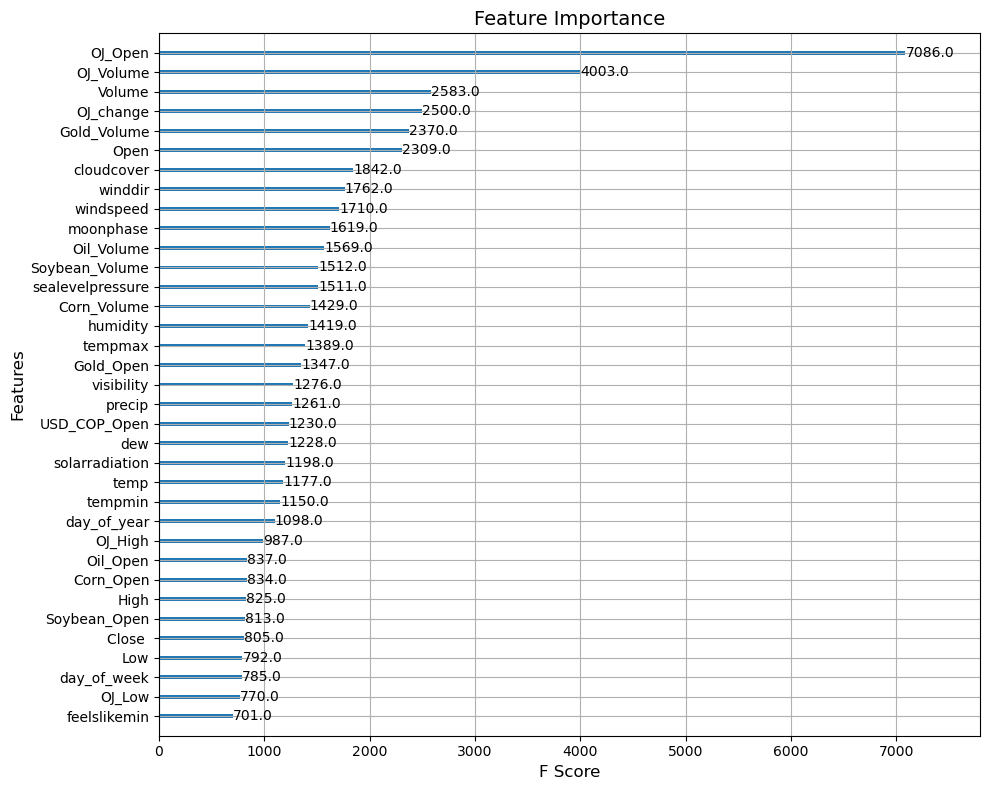

In [268]:
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
xgb.plot_importance(model, ax=ax, max_num_features=35, importance_type="weight")  # Show top 20 features
ax.set_title("Feature Importance", fontsize=14)
ax.set_xlabel("F Score", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()  # Automatically adjust spacing for readability
plt.show()

In [ ]:
print(np.sum(actual_directions))


-13


In [49]:
#combined_dataset['exchange_change'] = combined_dataset['USD_COP_Close'] - combined_dataset['USD_COP_Open']
x = combined_dataset['change']  # Coffee price
y = combined_dataset[''] # OJ futures price

# Cross-correlation at multiple lags
lags = np.arange(-len(x) + 1, len(x))
corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
normalized_corr = corr / (np.std(x) * np.std(y) * len(x))


plt.plot(lags, normalized_corr)
plt.title('Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()

KeyError: ''

Train MSE: 8.69368219985146, Train MAE: 2.1385296005288086
Test MSE: 20.917287540258986, Test MAE: 3.4965004187882665


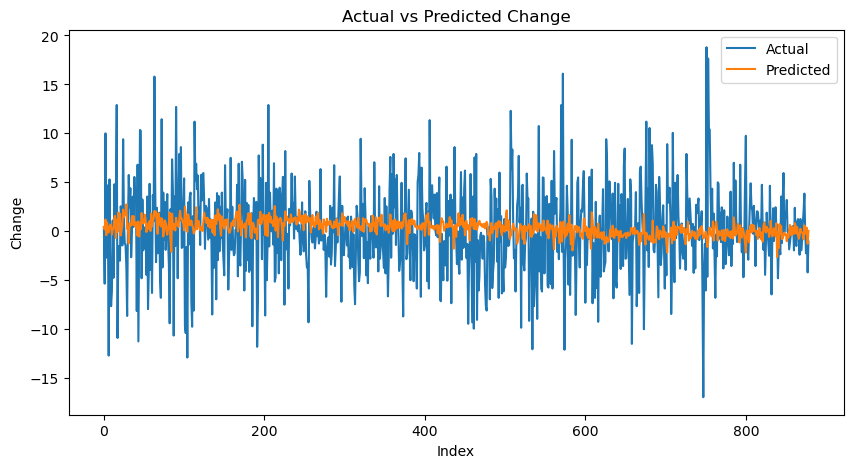

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the model
lin_reg_model = LinearRegression()

# Fit the model
lin_reg_model.fit(x_train, y_train)

# Make predictions
y_train_pred = lin_reg_model.predict(x_train)
y_test_pred = lin_reg_model.predict(x_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train MAE: {train_mae}')
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Change')
plt.title('Actual vs Predicted Change')
plt.show()

In [187]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the model
lasso_model = Lasso()

# Fit the model
lasso_model.fit(x_train, y_train)

# Make predictions
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train MAE: {train_mae}')
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}')

sig_columns = []
for name, coef in zip(x_train.columns, lasso_model.coef_):
    print(name, coef)
    if coef != 0:
        sig_columns.append(name)

print(sig_columns)
new_x_train = x_train[sig_columns].to_numpy()
new_x_test = x_test[sig_columns].to_numpy()


Train MSE: 8.909179467968446, Train MAE: 2.1597668823153042
Test MSE: 20.424879576682564, Test MAE: 3.4492290622058657
OJ_Open 0.0
OJ_High 0.0
OJ_Low 0.0
OJ_Close 0.0005698812430922408
OJ_adj_close 0.0
OJ_Volume 1.1269138418972336e-05
Open -0.0
High -0.0
Low -0.0
Close  -0.0018969675081385042
Adj Close  -0.0
Volume -5.140062145836924e-06
OJ_change 0.0
USD_COP_Open -0.00011135216041147535
USD_COP_High -0.0
USD_COP_Low -0.00023771879744550648
USD_COP_Close 0.00045161532735814444
USD_COP_adj_close 2.036523175890949e-18
Gold_Open -0.0
Gold_High 0.0
Gold_Low -0.00012960447795876655
Gold_Close -0.0
Gold_adj_close -0.0
Gold_Volume 1.3935406003169957e-06
tempmax 0.0
tempmin -0.0
temp 0.0
feelslikemax 0.0
feelslikemin -0.0
feelslike 0.0
dew -0.0
humidity -0.0
precip -0.0
precipprob -0.0
precipcover -0.0
windspeed -0.0
winddir 0.0
sealevelpressure 0.0
cloudcover -0.0
visibility 0.0
solarradiation 0.0015233582246979957
solarenergy 0.0
uvindex 0.0
sunrise -0.0
sunset -0.0
moonphase 0.0
conditions_

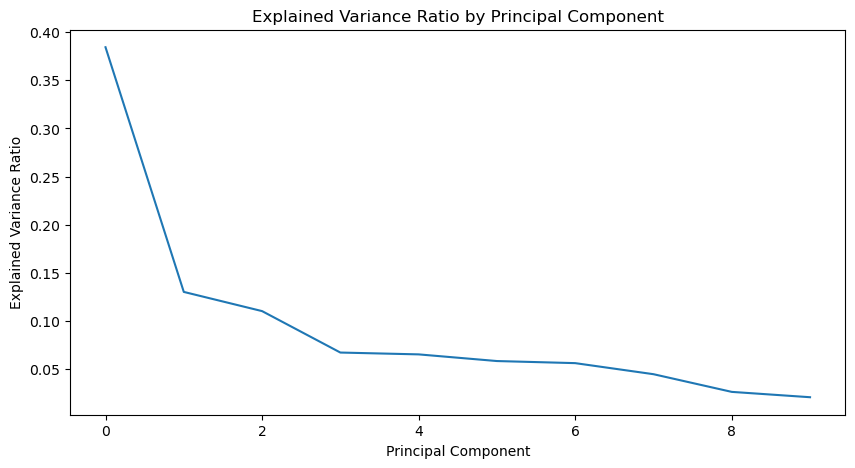

Number of principal components: 10
Number of components explaining 90% variance: 7
[5.76922215 1.95036829 1.65081592 1.00401567 0.97538175 0.87137864
 0.83875289 0.66610072 0.39009084 0.30676097]
14.422887843470061


14.422887843470061

In [273]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train = new_x_train
x_test = new_x_test

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the PCA model
pca = PCA(n_components=0.95)

# Fit the model
pca.fit(x_train_scaled)

# Transform the data
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


eig_vals = pca.explained_variance_

print(f"Number of principal components: {pca.n_components_}")
sorted_eig_vals = np.sort(eig_vals)[::-1]

cumulative_sum = 0
list_val = []
counter = 0
while cumulative_sum / np.sum(sorted_eig_vals) < 0.9:
    cumulative_sum += sorted_eig_vals[counter]
    counter += 1
    list_val.append(sorted)

print(f"Number of components explaining 90% variance: {counter}")
print(sorted_eig_vals)
print(np.sum(sorted_eig_vals))


np.sum(sorted_eig_vals)

(3062, 10)
[-1.99039407e-01 -2.18912706e-01 -1.04475731e-01 -2.28838304e-01
 -1.50652295e-01 -3.37944459e-01 -1.22359125e-01 -8.40308960e-02
 -1.43782434e-01 -6.94687881e-02 -5.35502961e-01 -2.43882908e-01
 -2.37406916e-01 -1.34954700e-01 -1.12815438e-01 -2.47063098e-01
 -1.87408652e-01 -8.94877500e-02 -8.99654427e-02 -8.31966223e-02
 -1.58428994e-01 -1.33397775e-01 -1.10665400e-01 -9.79388965e-02
 -8.33479080e-02 -3.58800794e-02 -4.78981881e-02 -4.99478423e-02
 -1.73359253e-01 -3.15371093e-01 -2.32914607e-01 -4.57357037e-01
 -1.61143417e-01 -1.62655441e-01 -1.37650549e-01 -3.52810288e-01
 -3.98419704e-01 -9.32815548e-02 -1.04564496e-01 -1.92225184e-01
 -2.34853149e-01 -1.53559896e-01 -5.09397697e-01 -2.30394138e-01
 -2.49452185e-01 -5.29101627e-01 -2.14640395e-01 -1.06744714e-01
 -1.92607179e-01 -5.73946497e-01 -5.24942797e-01  8.41050777e-03
 -1.82973136e-01 -2.07457234e-01 -5.00415045e-01 -5.33518558e-01
 -3.29651086e-01 -1.88147760e-01 -4.80065704e-01 -2.49224388e-01
 -3.93883815e-

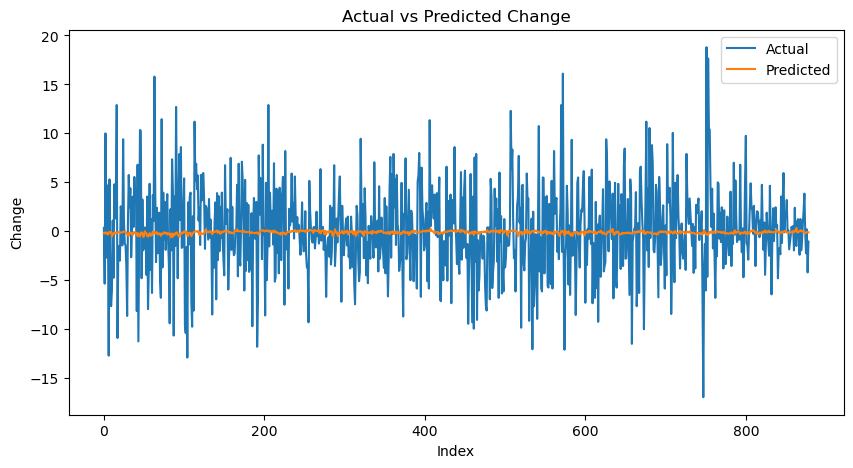

In [275]:

#pca_columns = [f'PC{i+1}' for i in range(x_train_pca.shape[1])]
#x_train_pca_df = pd.DataFrame(x_train_pca, columns=pca_columns, index=x_train.index)
#x_test_pca_df = pd.DataFrame(x_test_pca, columns=pca_columns, index=x_test.index)

# Combine the PCA components with the original dataset
#x_train_combined = pd.concat([x_train.reset_index(drop=True), x_train_pca_df.reset_index(drop=True)], axis=1)
#x_test_combined = pd.concat([x_test.reset_index(drop=True), x_test_pca_df.reset_index(drop=True)], axis=1)


# Fit the linear regression model with the combined dataset
print(x_train_pca.shape)

lin_reg_model.fit(x_train_pca, y_train)

# Make predictions
y_train_pred = lin_reg_model.predict(x_train_pca)
y_test_pred = lin_reg_model.predict(x_test_pca)
print(y_test_pred)
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train MAE: {train_mae}')
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Change')
plt.title('Actual vs Predicted Change')
plt.show()

In [279]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_size, output_size)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.layer_norm(out[:, -1, :])
        out = self.dropout(out)
        out = self.fc(out)
        return out
    
model = LSTM(input_size=15, hidden_size=64, num_layers=3, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
print(new_x_train.shape)
x_train_tensor = torch.from_numpy(new_x_train).float().view(-1, 1, 15)
x_test_tensor = torch.from_numpy(new_x_test).float().view(-1, 1, 15)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)

n_epochs = 1
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')

y_test_pred = model(x_test_tensor)


(3062, 15)
Epoch 0 loss: 9.049139022827148


20.648045049888154
3.473174687967433


<Axes: >

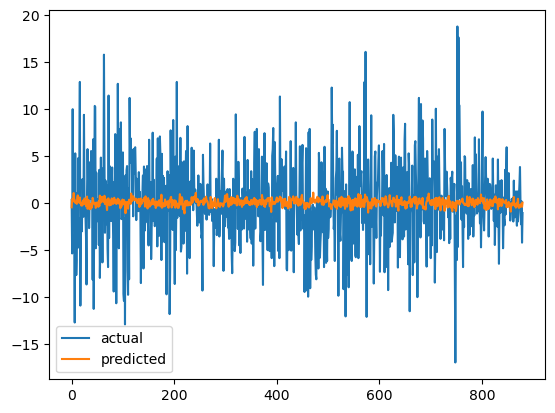

In [280]:
mse = mean_squared_error(y_test, y_test_pred.detach().numpy())
print(mse)
mae = mean_absolute_error(y_test, y_test_pred.detach().numpy())
print(mae)
plot = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred.detach().numpy().flatten()})
plot.plot()

In [281]:
#directional accuracy
actual_directions = np.sign(y_test)
predicted_directions = np.sign(y_test_pred.detach().numpy().flatten())

directional_matches = (actual_directions == predicted_directions).astype(int)
directional_accuracy = directional_matches.sum() / len(directional_matches)
print(directional_accuracy)


0.4812286689419795


In [282]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.fc1 = nn.Linear(32 * 1, 64)
        self.fc2 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.layer_norm = nn.LayerNorm(32)
        self.dropout = nn.Dropout(0.2)
        self.layer_norm2 = nn.LayerNorm(64)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.layer_norm(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.layer_norm(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN(input_size=20, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.from_numpy(x_train_pca).float().view(-1, 1, 20)
x_test_tensor = torch.from_numpy(x_test_pca).float().view(-1, 1, 20)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)

n_epochs = 300
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')

RuntimeError: shape '[-1, 1, 20]' is invalid for input of size 8790

In [139]:
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [283]:
class HybridCNNLSTM(nn.Module):
    def __init__(self, input_features=15, timesteps=30, lstm_hidden_size=50, output_size=1):
        super(HybridCNNLSTM, self).__init__()
        
        # Convolutional layer
        self.conv1d = nn.Conv1d(
            in_channels=input_features, 
            out_channels=64, 
            kernel_size=3, 
            stride=1, 
            padding=1
        )
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        
        # Adjust max pooling kernel size and stride for compatibility
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2)  

        # Compute adjusted timesteps after pooling
        pooled_timesteps = timesteps  # Ensure this is valid
        
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=64, 
            hidden_size=lstm_hidden_size,
            num_layers=2,
            dropout=0.2,
            batch_first=True
        )
        
        # Fully connected layers
        self.fc1 = nn.Linear(lstm_hidden_size * pooled_timesteps, 50)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(50, output_size)

    def forward(self, x):
        # Input shape: (batch_size, timesteps, features)
        #x = x.permute(0, 2, 1)  # Transpose for Conv1d
        
        # Convolutional layer
        x = self.conv1d(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        #x = self.maxpool(x)  # Shape: (batch_size, 64, timesteps//2)

        # Transpose for LSTM
        x = x.permute(0, 2, 1)  
        
        # LSTM
        x, (hn, cn) = self.lstm(x)
        
        # Flatten the LSTM output
        x = x.contiguous().view(x.size(0), -1)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)

        return x


# Model instantiation
model = HybridCNNLSTM(input_features=15, timesteps=1)
print(model)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Convert data to PyTorch tensors
x_train_tensor = torch.from_numpy(new_x_train).float().view(-1, 1, 15)
x_test_tensor = torch.from_numpy(new_x_test).float().view(-1, 1, 15)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)

x_train_tensor = torch.from_numpy(new_x_train).float().unsqueeze(1)  # Shape: (num_samples, 1, 15)
x_test_tensor = torch.from_numpy(new_x_test).float().unsqueeze(1)

# Assuming new_x_train and new_x_test have shape (num_samples, timesteps, features)
# where timesteps = 30 and features = 15.
   # Shape: (num_samples, timesteps, features)

# Reshaping for CNN: (batch_size, features, timesteps)
x_train_tensor = x_train_tensor.permute(0, 2, 1)  # Shape: (batch_size, features, timesteps)
x_test_tensor = x_test_tensor.permute(0, 2, 1)    # Shape: (batch_size, features, timesteps)


# Adjust labels (y_train_tensor, y_test_tensor)
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)

print(x_train_tensor.shape)


epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} loss: {loss.item()}')
        
y_test_pred = model(x_test_tensor)



HybridCNNLSTM(
  (conv1d): Conv1d(15, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(64, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=50, out_features=50, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)
torch.Size([3062, 15, 1])
Epoch 0 loss: 8.94111156463623
Epoch 10 loss: 8.937317848205566
Epoch 20 loss: 8.940217971801758
Epoch 30 loss: 8.941549301147461
Epoch 40 loss: 8.938003540039062
Epoch 50 loss: 8.932796478271484
Epoch 60 loss: 8.941161155700684
Epoch 70 loss: 8.934263229370117
Epoch 80 loss: 8.94060230255127
Epoch 90 loss: 8.927750587463379
Epoch 100 loss: 8.927042961120605
Epoch 110 loss: 8.935059547424316
Epoch 120 loss: 8.934682846069336
Epoch 130 loss: 8.930753

KeyboardInterrupt: 

20.648045049888154
3.473174687967433


<Axes: >

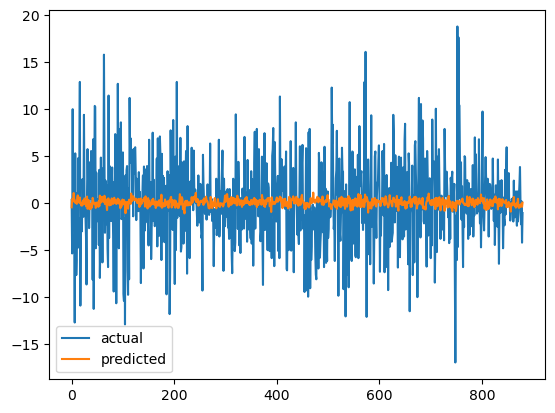

In [284]:
mse = mean_squared_error(y_test, y_test_pred.detach().numpy())
print(mse)
mae = mean_absolute_error(y_test, y_test_pred.detach().numpy())
print(mae)
plot = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred.detach().numpy().flatten()})
plot.plot()

['OJ_Close', 'OJ_Volume', 'Close\xa0', 'Volume', 'USD_COP_Open', 'USD_COP_Low', 'USD_COP_Close', 'USD_COP_adj_close', 'Gold_Low', 'Gold_Volume', 'solarradiation', 'Oil_Volume', 'Corn_Volume', 'Soybean_Close', 'Soybean_Volume', 'Date', 'change']


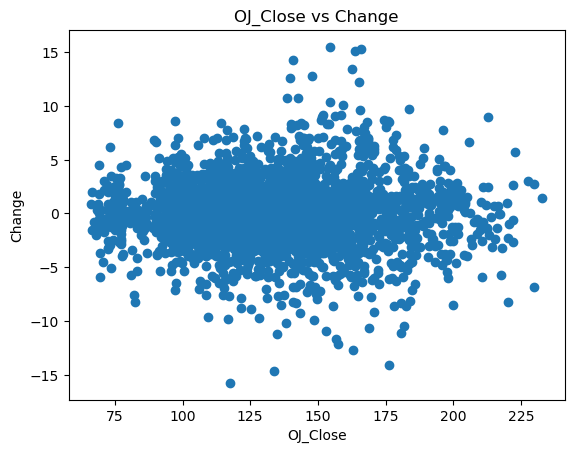

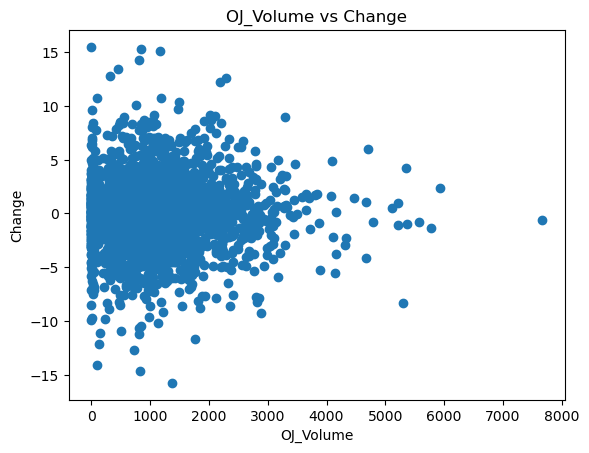

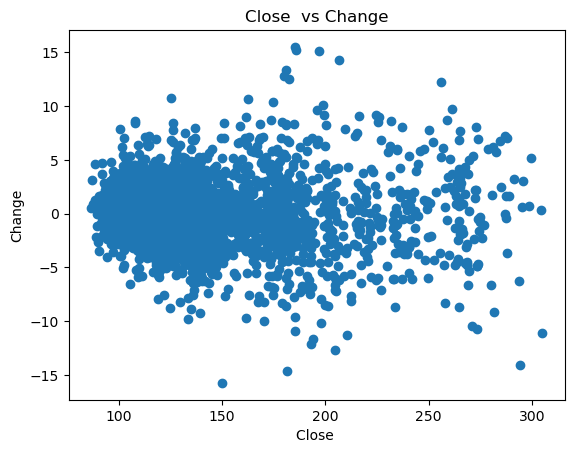

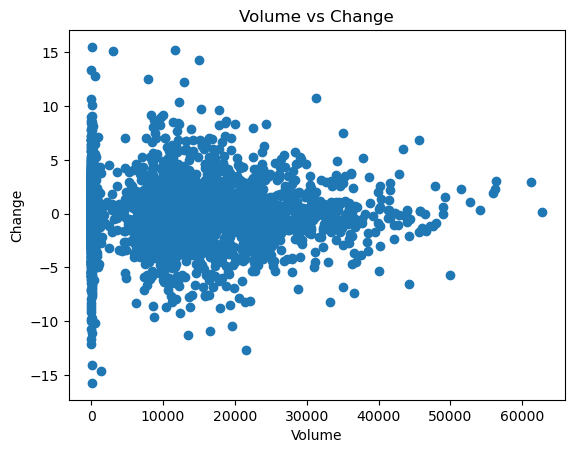

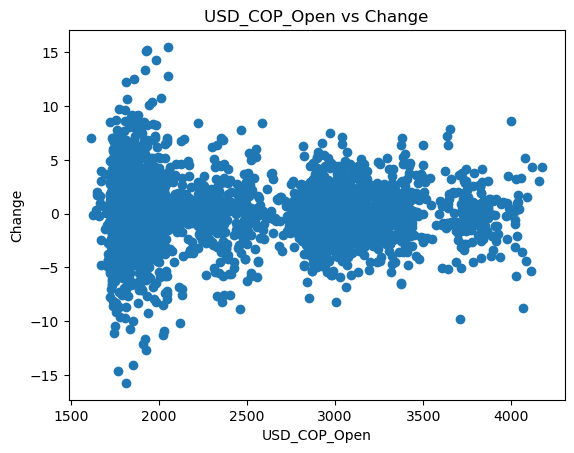

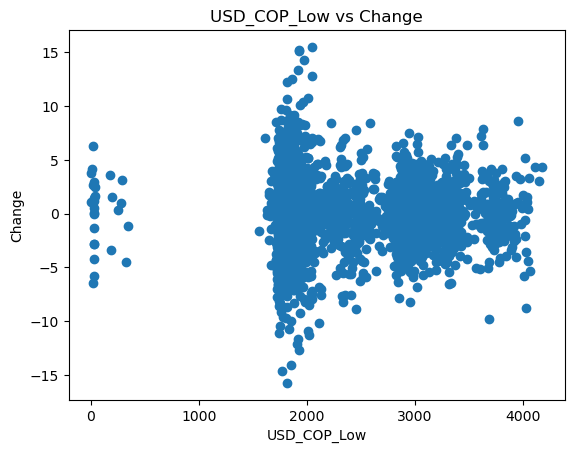

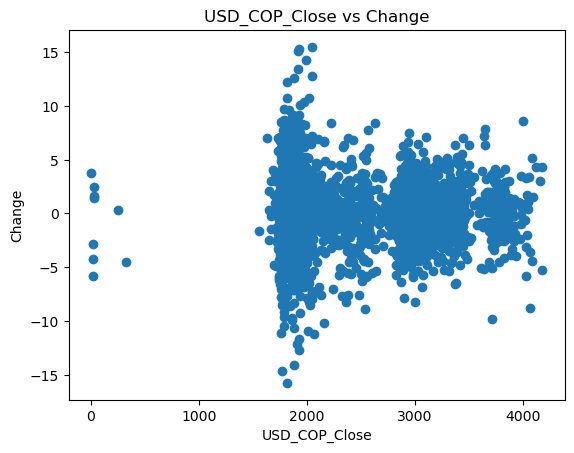

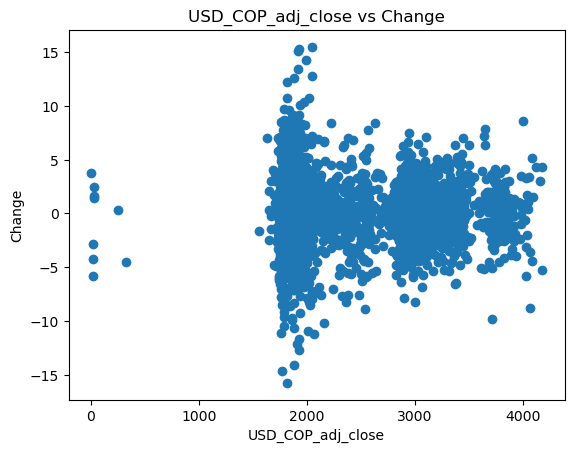

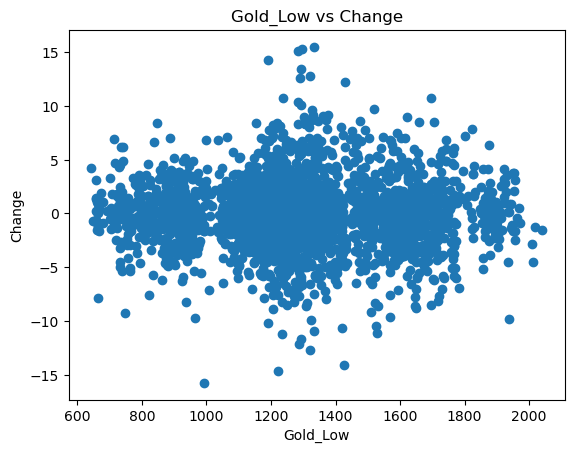

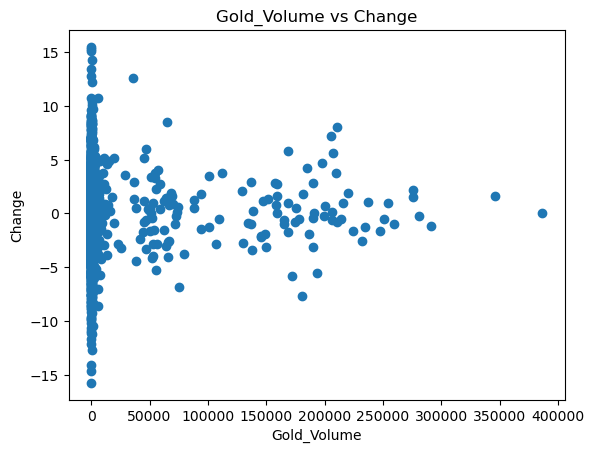

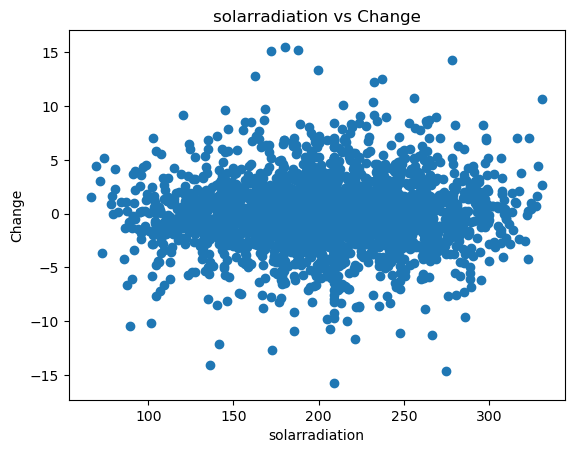

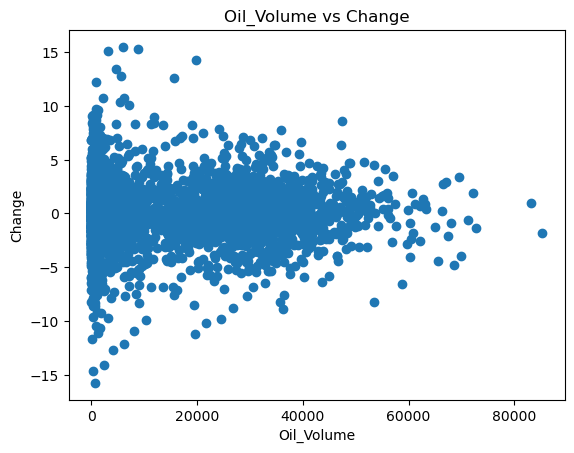

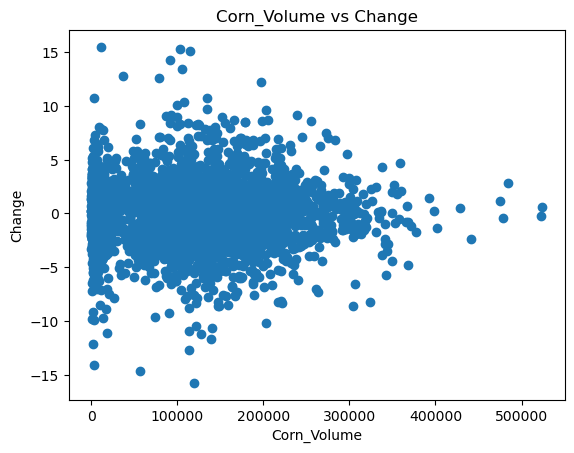

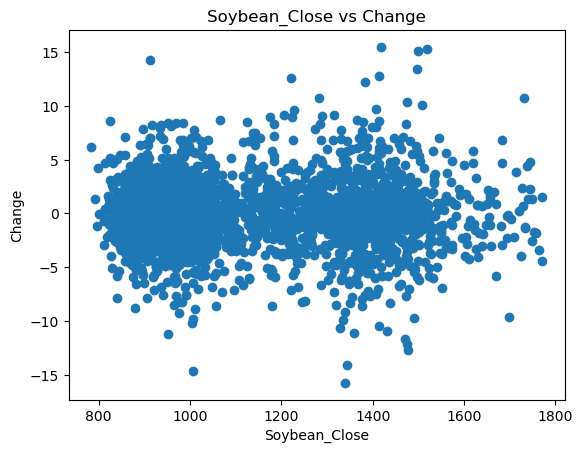

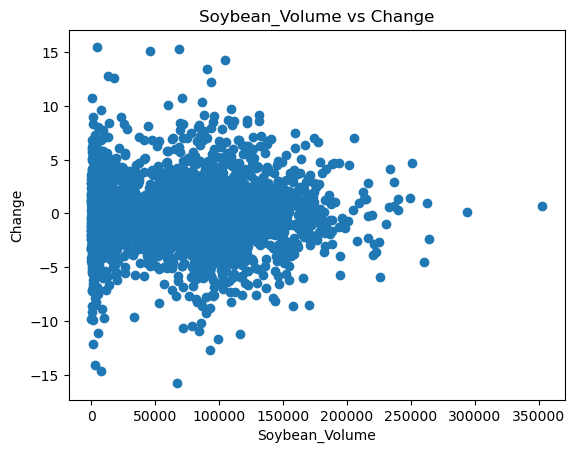

In [289]:
import matplotlib.pyplot as plt
import pandas as pd
print(sig_columns)
sig_columns = sig_columns[:15]
new_x_train_df = pd.DataFrame(new_x_train, columns=sig_columns)

for feature in new_x_train_df.columns:
    plt.scatter(new_x_train_df[feature], y_train)
    plt.xlabel(feature)
    plt.ylabel('Change')
    plt.title(f'{feature} vs Change')
    plt.show()

In [290]:
#sig_columns.append('Date')
#sig_columns.append('change')
df = pd.DataFrame(combined_dataset)
for feature in sig_columns:
    if feature != 'Date':
        for lag in range(1, 100):
            df[f'{feature}_lag_{lag}'] = df[feature].shift(-1*lag)

#print(df)

df = df.dropna()
print(df.columns)
print(df['Date'])
x_train = df[df['Date'] < '2021-01-01']
x_test = df[df['Date'] >= '2021-01-01']
y_train = x_train['change']
y_test = x_test['change']
x_train = x_train.drop(columns=['Date', 'change'])
x_test = x_test.drop(columns=['Date', 'change'])
        

C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\3682846074.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(-1*lag)
C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\3682846074.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(-1*lag)
C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\3682846074.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Index(['Date', 'OJ_Open', 'OJ_High', 'OJ_Low', 'OJ_Close', 'OJ_adj_close',
       'OJ_Volume', 'Open', 'High', 'Low',
       ...
       'change_lag_90', 'change_lag_91', 'change_lag_92', 'change_lag_93',
       'change_lag_94', 'change_lag_95', 'change_lag_96', 'change_lag_97',
       'change_lag_98', 'change_lag_99'],
      dtype='object', length=1659)
0      2024-10-15
1      2024-10-14
2      2024-10-11
3      2024-10-10
4      2024-10-09
          ...    
3866   2008-01-02
3867   2007-12-31
3868   2007-12-28
3869   2007-12-27
3870   2007-12-26
Name: Date, Length: 3842, dtype: datetime64[ns]


In [294]:
model = LinearRegression()

model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))



print(sig_columns)

35.636247676156806
4.688778538463629
['OJ_Close', 'OJ_Volume', 'Close\xa0', 'Volume', 'USD_COP_Open', 'USD_COP_Low', 'USD_COP_Close', 'USD_COP_adj_close', 'Gold_Low', 'Gold_Volume', 'solarradiation', 'Oil_Volume', 'Corn_Volume', 'Soybean_Close', 'Soybean_Volume', 'Date', 'change']


In [293]:
model = Lasso()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("MSE : " + str(mean_squared_error(y_test, predictions)))
print("MAE :" + str(mean_absolute_error(y_test, predictions)))

#directional accuracy
actual_directions = np.sign(y_test)
predicted_directions = np.sign(predictions)
matches = (actual_directions == predicted_directions).astype(int)
directional_accuracy = matches.sum() / len(matches)
print("Dir Acc : " + str(directional_accuracy))

for name, coef in zip(x_train.columns, model.coef_):
    print(name, coef)
    


MSE : 23.96730402729388
MAE :3.76548521325393
Dir Acc : 0.5017064846416383
OJ_Open 0.0
OJ_High 0.0
OJ_Low 0.0
OJ_Close 0.0
OJ_adj_close 0.0
OJ_Volume 2.4222497854193282e-05
Open -0.0
High -0.0
Low -0.0
Close  -0.0
Adj Close  -0.0
Volume 4.769877349506838e-06
OJ_change 0.0
USD_COP_Open 0.00019580168413234277
USD_COP_High 0.0
USD_COP_Low -0.0006602095700491776
USD_COP_Close 0.0005916191607217391
USD_COP_adj_close 0.0
Gold_Open 0.0
Gold_High 0.0
Gold_Low -0.0
Gold_Close 0.0
Gold_adj_close 0.0
Gold_Volume 1.9514085209093988e-06
tempmax -0.0
tempmin 0.0
temp 0.0
feelslikemax -0.0
feelslikemin 0.0
feelslike 0.0
dew 0.0
humidity 0.0
precip 0.0
precipprob 0.0
precipcover 0.0
windspeed -0.0
winddir -0.0
sealevelpressure 0.0
cloudcover 0.0
visibility 0.0
solarradiation 0.0019531295383763783
solarenergy 0.0
uvindex 0.0
sunrise -0.0
sunset -0.0
moonphase 0.0
conditions_Overcast 0.0
conditions_Partially cloudy -0.0
conditions_Rain, Overcast -0.0
conditions_Rain, Partially cloudy 0.0
conditions_Snow

c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.808e+03, tolerance: 2.683e+00
  model = cd_fast.enet_coordinate_descent(


In [303]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Convert target to directional (-1, 1)
y_dir_train = np.sign(y_train)
y_dir_test = np.sign(y_test)

y_dir_train_mapped = (y_dir_train + 1).astype(int)  # Shift classes: -1 → 0, 0 → 1, 1 → 2
y_dir_test_mapped = (y_dir_test + 1).astype(int)
# Train XGBClassifier
model = XGBClassifier(eval_metric='logloss', learning_rate=0.1, n_estimators = 300)
model.fit(x_train, y_dir_train_mapped)

# Predict
predicted_directions = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_dir_test_mapped, predicted_directions)
mae = mean_absolute_error(y_dir_test_mapped, predicted_directions)
accuracy = accuracy_score(y_dir_test_mapped, predicted_directions)

print("MSE :", mse)
print("MAE :", mae)
print("Directional Accuracy:", accuracy)



MSE : 1.9271899886234358
MAE : 0.9670079635949943
Directional Accuracy: 0.5130830489192264


In [300]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [1000],
    'max_depth': [5, 7],
    'min_child_weight': [5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0.1],
    'lambda': [0],
    'alpha': [0],
}

# Set up XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_dir_train_mapped)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


KeyboardInterrupt: 

In [307]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_dir_train_mapped)

KeyboardInterrupt: 

In [355]:
import ta
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator
from ta.trend import SMAIndicator, EMAIndicator, ADXIndicator, CCIIndicator
from ta.volatility import BollingerBands
from ta.volume import VolumeWeightedAveragePrice

col = combined_dataset.columns[10]
combined_datatechincals = combined_dataset
combined_datatechincals["rsi"] = ta.momentum.RSIIndicator(close=combined_dataset[col].iloc[::-1], window=14).rsi().iloc[::-1]
combined_datatechincals["sma"] = ta.trend.SMAIndicator(close=combined_dataset[col].iloc[::-1], window=14).sma_indicator().iloc[::-1]
combined_datatechincals["ema"] = ta.trend.EMAIndicator(close=combined_dataset[col].iloc[::-1], window=14).ema_indicator().iloc[::-1]
bb = BollingerBands(close=combined_dataset[col].iloc[::-1], window=20, window_dev=2)
combined_datatechincals["bb_hband"] = bb.bollinger_hband().iloc[::-1]
combined_datatechincals["bb_lband"] = bb.bollinger_lband().iloc[::-1]
combined_datatechincals["bb_diff"] = bb.bollinger_hband().iloc[::-1] - bb.bollinger_lband().iloc[::-1]
combined_datatechincals["vwap"] = ta.volume.VolumeWeightedAveragePrice(high=combined_dataset["High"].iloc[::-1], low=combined_dataset["Low"].iloc[::-1], close=combined_dataset[col].iloc[::-1], volume=combined_dataset["Volume"].iloc[::-1]).volume_weighted_average_price().iloc[::-1]
combined_datatechincals["roc"] = ta.momentum.ROCIndicator(close=combined_dataset[col].iloc[::-1], window=21).roc().iloc[::-1]
combined_datatechincals["stoch"] = ta.momentum.StochasticOscillator(high=combined_dataset["High"].iloc[::-1], low=combined_dataset["Low"].iloc[::-1], close=combined_dataset[col].iloc[::-1], window=14).stoch().iloc[::-1]
combined_datatechincals["stoch_signal"] = ta.momentum.StochasticOscillator(high=combined_dataset["High"].iloc[::-1], low=combined_dataset["Low"].iloc[::-1], close=combined_dataset[col].iloc[::-1], window=14).stoch_signal().iloc[::-1]
adx = ta.trend.ADXIndicator(high=combined_dataset["High"].iloc[::-1], low=combined_dataset["Low"].iloc[::-1], close=combined_dataset[col], window=14)
combined_datatechincals["adx neg"] = adx.adx_neg().iloc[::-1]
combined_datatechincals["adx pos"] = adx.adx_pos().iloc[::-1]
combined_datatechincals["adx"] = adx.adx().iloc[::-1]
combined_datatechincals["cci"] = ta.trend.CCIIndicator(high=combined_dataset["High"].iloc[::-1], low=combined_dataset["Low"].iloc[::-1], close=combined_dataset[col].iloc[::-1], window=20).cci()
combined_datatechincals = combined_datatechincals.dropna()

combined_datatechincals['OJ cci'] = ta.trend.CCIIndicator(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], window=20).cci()
combined_datatechincals['OJ rsi'] = ta.momentum.RSIIndicator(close=combined_dataset['OJ_Close'].iloc[::-1], window=14).rsi().iloc[::-1]
combined_datatechincals['OJ ema'] = ta.trend.EMAIndicator(close=combined_dataset['OJ_Close'].iloc[::-1], window=14).ema_indicator().iloc[::-1]
bb = BollingerBands(close=combined_dataset['OJ_Close'].iloc[::-1], window=20, window_dev=2)
combined_datatechincals['OJ bb_hband'] = bb.bollinger_hband().iloc[::-1]
combined_datatechincals['OJ bb_lband'] = bb.bollinger_lband().iloc[::-1]
combined_datatechincals['OJ bb_diff'] = bb.bollinger_hband().iloc[::-1] - bb.bollinger_lband().iloc[::-1]
combined_datatechincals['OJ vwap'] = ta.volume.VolumeWeightedAveragePrice(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], volume=combined_dataset['OJ_Volume'].iloc[::-1]).volume_weighted_average_price().iloc[::-1]
combined_datatechincals['OJ roc'] = ta.momentum.ROCIndicator(close=combined_dataset['OJ_Close'].iloc[::-1], window=21).roc().iloc[::-1]
combined_datatechincals['OJ stoch'] = ta.momentum.StochasticOscillator(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], window=14).stoch().iloc[::-1]
combined_datatechincals['OJ stoch_signal'] = ta.momentum.StochasticOscillator(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], window=14).stoch_signal().iloc[::-1]
adx = ta.trend.ADXIndicator(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], window=14)
combined_datatechincals['OJ adx neg'] = adx.adx_neg().iloc[::-1]
combined_datatechincals['OJ adx pos'] = adx.adx_pos().iloc[::-1]
combined_datatechincals['OJ adx'] = adx.adx().iloc[::-1]

combined_datatechincals = combined_datatechincals.dropna()





C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\4097188421.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_datatechincals['OJ cci'] = ta.trend.CCIIndicator(high=combined_dataset['OJ_High'].iloc[::-1], low=combined_dataset['OJ_Low'].iloc[::-1], close=combined_dataset['OJ_Close'].iloc[::-1], window=20).cci()
C:\Users\liamk\AppData\Local\Temp\ipykernel_26608\4097188421.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_datatechincals['OJ rsi'] = ta.momentum.RSIIndicator(close=combine

In [356]:
model = Lasso()
print(combined_datatechincals)
train = combined_datatechincals[combined_datatechincals['Date'] < '2021-01-01']
test = combined_datatechincals[combined_datatechincals['Date'] >= '2021-01-01']
x_train = train.drop(columns=['Date', 'change'])
y_train = train['change']
x_test = test.drop(columns=['Date', 'change'])
y_test = test['change']
y_train = np.sign(y_train)
y_test = np.sign(y_test)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE : " + str(mse))
print("MAE : " + str(mae))

for name, coef in zip(x_train.columns, model.coef_):
    print(name, coef)

directional_matches = (np.sign(predictions) == np.sign(y_test)).astype(int)
directional_accuracy = directional_matches.sum() / len(directional_matches)
print("Directional Accuracy : " + str(directional_accuracy))


           Date  OJ_Open  OJ_High  OJ_Low  OJ_Close  OJ_adj_close  OJ_Volume  \
0    2024-10-15   494.95   509.60  485.15    496.55        496.55     1627.0   
1    2024-10-14   479.80   496.10  479.80    495.90        495.90     1201.0   
2    2024-10-11   458.10   479.20  458.05    479.20        479.20     1134.0   
3    2024-10-10   476.00   477.60  457.60    459.20        459.20     1488.0   
4    2024-10-09   479.90   482.40  473.70    477.20        477.20      789.0   
...         ...      ...      ...     ...       ...           ...        ...   
3946 2007-09-05   121.50   125.50  120.00    121.15        121.15       17.0   
3948 2007-08-31   126.00   127.50  125.00    125.00        125.00      678.0   
3949 2007-08-30   128.50   128.70  123.50    126.00        126.00      481.0   
3950 2007-08-29   126.25   128.95  125.10    128.95        128.95      765.0   
3951 2007-08-28   126.00   128.00  124.50    126.50        126.50      872.0   

        Open    High     Low  ...  OJ b

In [375]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
y_dir_train_mapped = (y_train + 1).astype(int)  # Shift classes: -1 → 0, 0 → 1, 1 → 2
y_dir_test_mapped = (y_test + 1).astype(int)
model = XGBClassifier(leanrning_rate=0.1, n_estimators=1000, max_depth=7)
model.fit(x_train, y_dir_train_mapped)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE : " + str(mse))
print("MAE : " + str(mae))

pred_dir = predictions
actual_dir = y_dir_test_mapped
matches = (pred_dir == actual_dir).astype(int)
directional_accuracy = matches.sum() / len(matches)
print("Directional Accuracy : " + str(directional_accuracy))

print(len(matches))




c:\Users\liamk\miniconda3\envs\csci1470\lib\site-packages\xgboost\core.py:158: UserWarning: [19:56:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "leanrning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


MSE : 2.704209328782708
MAE : 1.4254835039817975
Directional Accuracy : 0.5312855517633674
879


In [366]:
print(len(combined_datatechincals.columns))


102


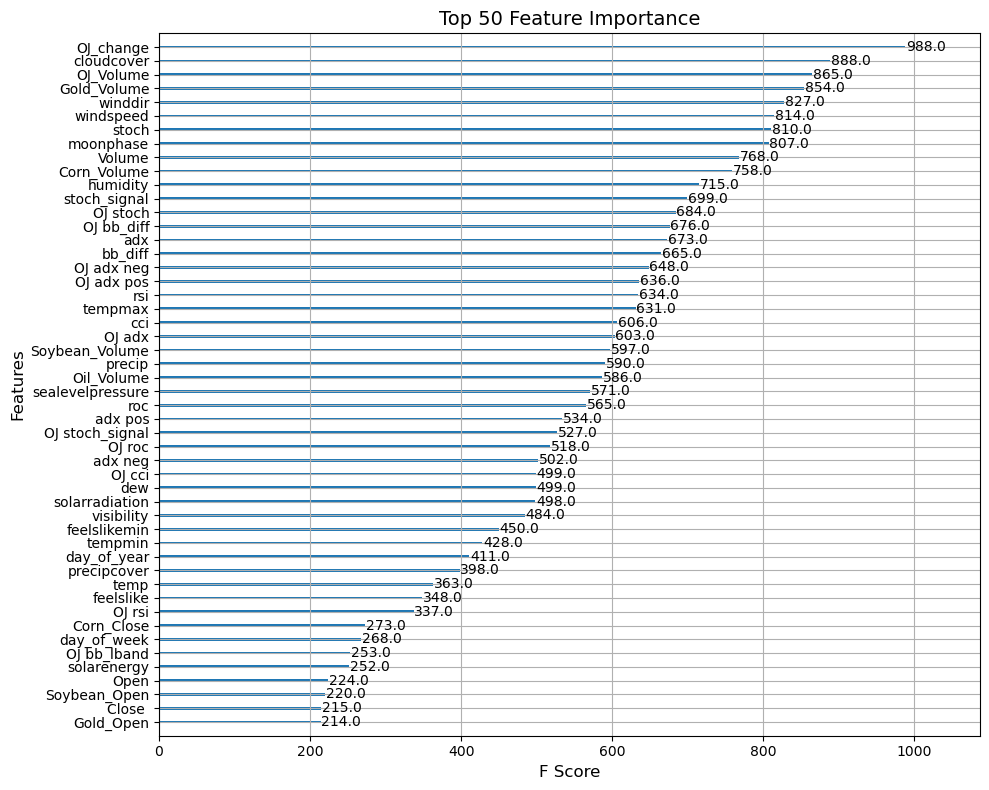

In [367]:
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
xgb.plot_importance(model, ax=ax, max_num_features=50, importance_type="weight")  # Show top 20 features
ax.set_title("Top 50 Feature Importance", fontsize=14)
ax.set_xlabel("F Score", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()  # Automatically adjust spacing for readability
plt.show()

In [368]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_dir_train_mapped)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE : " + str(mse))
print("MAE : " + str(mae))

pred_dir = predictions
actual_dir = y_dir_test_mapped
matches = (pred_dir == actual_dir).astype(int)
directional_accuracy = matches.sum() / len(matches)
print("Directional Accuracy : " + str(directional_accuracy))


MSE : 2.3447098976109215
MAE : 1.3321956769055745
Directional Accuracy : 0.5096700796359499


In [379]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_dir_train_mapped)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("MSE : " + str(mse))
print("MAE : " + str(mae))

pred_dir = predictions
actual_dir = y_dir_test_mapped
matches = (pred_dir == actual_dir).astype(int)
directional_accuracy = matches.sum() / len(matches)
print("Directional Accuracy : " + str(directional_accuracy))

print(predictions)
print(y_dir_test_mapped)


MSE : 2.4254835039817975
MAE : 1.2787258248009101
Directional Accuracy : 0.36860068259385664
[0 1 1 1 0 2 2 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 2 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 2 1 0 2 1 1 0 2 0 0
 2 0 0 0 0 0 0 1 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 2 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2
 1 1 1 1 1 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0
 0 0 2 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 2 1 0 0 1 1 2 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 0 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 2 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 0 2 0 2 0 2 0 0 0
 0 0 0 